In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import cv2

In [15]:
img = cv2.imread("learn.jpg")
img

array([[[110,  37,  15],
        [110,  37,  15],
        [110,  37,  15],
        ...,
        [110,  37,  15],
        [110,  37,  15],
        [110,  37,  15]],

       [[110,  37,  15],
        [110,  37,  15],
        [110,  37,  15],
        ...,
        [110,  37,  15],
        [110,  37,  15],
        [110,  37,  15]],

       [[110,  37,  15],
        [110,  37,  15],
        [110,  37,  15],
        ...,
        [110,  37,  15],
        [110,  37,  15],
        [110,  37,  15]],

       ...,

       [[110,  37,  15],
        [110,  37,  15],
        [110,  37,  15],
        ...,
        [110,  37,  15],
        [110,  37,  15],
        [110,  37,  15]],

       [[110,  37,  15],
        [110,  37,  15],
        [110,  37,  15],
        ...,
        [110,  37,  15],
        [110,  37,  15],
        [110,  37,  15]],

       [[110,  37,  15],
        [110,  37,  15],
        [110,  37,  15],
        ...,
        [110,  37,  15],
        [110,  37,  15],
        [110,  37,  15]]

#cv2.imshow opens it in a new window:

cv2.imshow('winname',img) 

cv2.waitKey(0)

cv2.destroyAllWindows()

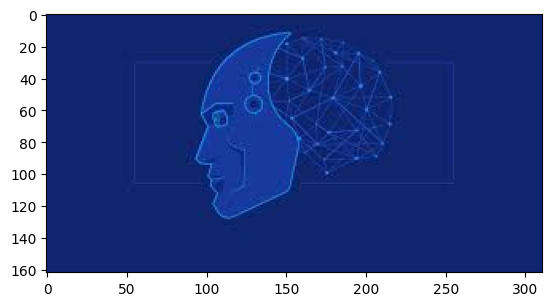

In [16]:
#plt.show opens it inline in the terminal as a plot
# just plt.imshow(img) will show a different coloured image because opencv saves image in BGR while we see it in RGB
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

**Accessing Individual Pixels** 

In [17]:
img.shape 
#output = (n,m,c) where n=height, m=width and c=number of channels i.e. Blue,Green,Red


(162, 311, 3)

In [18]:
img[50][35][2] #pixel at height 50, width 35 and in the red channel(B=0,G=1,R=2)

15

In [19]:
#accessing the BGR pixels located at x=50, y=35
(B, G, R) = img[50, 35] 
print("R={}, G={}, B={}".format(R, G, B))

R=15, G=37, B=110


**Resizing**

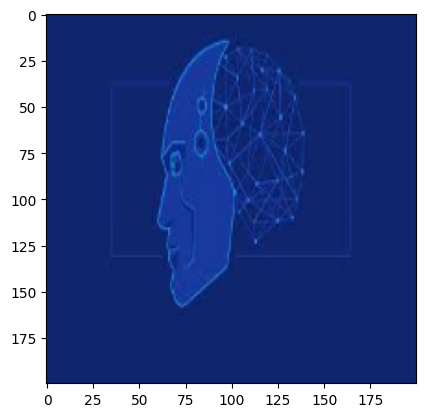

In [20]:
img2 = cv2.resize(img,(200,200))
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

**Cropping**

(80, 70, 3)
(162, 311, 3)


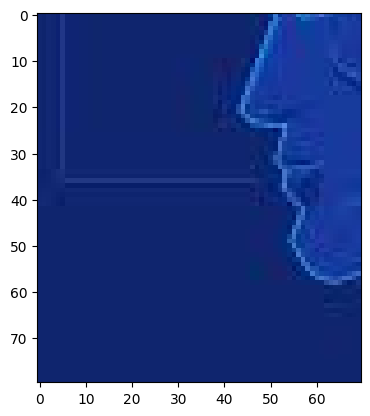

In [21]:
img3=img[70:150,50:120]
plt.imshow(cv2.cvtColor(img3,cv2.COLOR_BGR2RGB))
print(img3.shape)
print(img.shape)

**Drawing on Image**

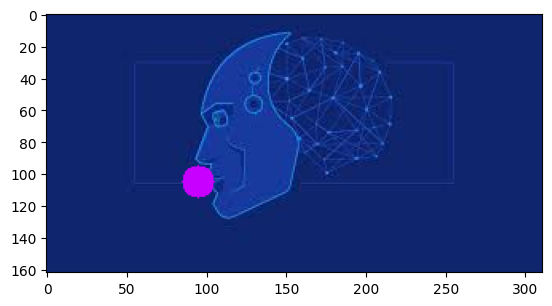

In [22]:
img4 = img.copy()
output = img4.copy()
cv2.circle(output, (95, 105), 10, (255, 0, 200), -1) #centre=95,105 radius=10 BGR=255,0,200 thickness=-1=filled in
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

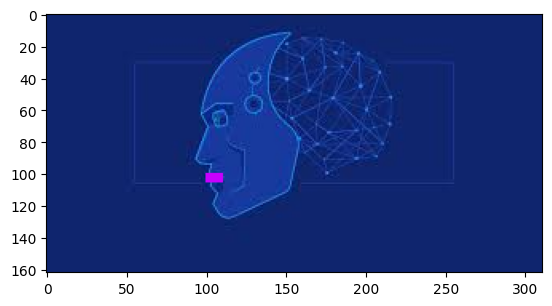

In [23]:
img4 = img.copy()
output = img4.copy()
cv2.rectangle(output, (100,100),(110,105) , (255, 0, 200), -1) #starting point=100,100  end point=110,105 BGR=255,0,200 thickness=-1=filled in
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

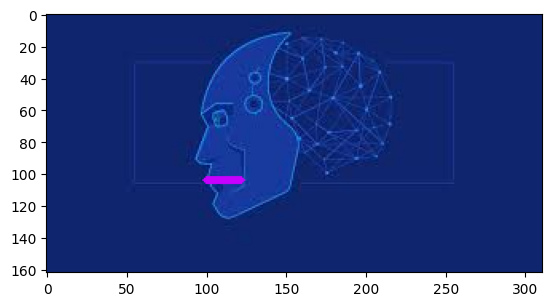

In [24]:
img4 = img.copy()
output = img4.copy()
cv2.line(output, (100,104),(122,104), (255, 0, 200), 3) #starting point= end point= BGR=255,0,200 thickness=3
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

**Converting Image to Grayscale**

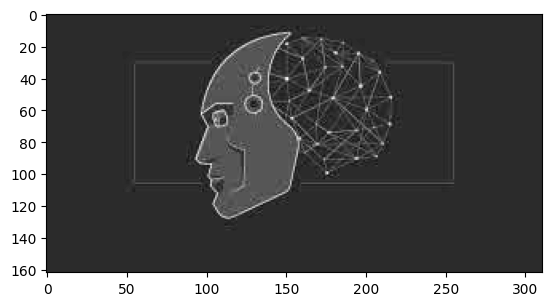

In [25]:
img5 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img5,cmap='gray')

**Kernel/Filter Convolution Operations**

1. Defining a Kernel convolution operation:

In [26]:
def convolution(kernel, image):

    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    xOutput = int((xImgShape - xKernShape) + 1)
    yOutput = int((yImgShape - yKernShape) + 1)
    output = np.zeros((xOutput, yOutput))
 
    for y in range(image.shape[1]):

        if y > image.shape[1] - yKernShape:
            break

        for x in range(image.shape[0]):
          
            if x > image.shape[0] - xKernShape:
                break
            try:
                      output[x, y] = (kernel * image[x: x + xKernShape, y: y + yKernShape]).sum()
            except:
                  break

    return output


Test to check above convolution function:

Kernel, Image and Output:

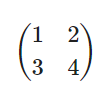  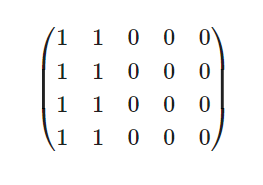  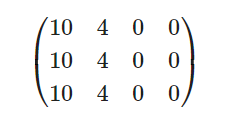

In [27]:
#this function must give the output as mentioned in the matrix above
convolution( np.array([[1,2], [3,4]]) , np.array([[1,1,0,0,0], [1,1,0,0,0], [1,1,0,0,0], [1,1,0,0,0]]))

array([[10.,  4.,  0.,  0.],
       [10.,  4.,  0.,  0.],
       [10.,  4.,  0.,  0.]])

2. Verticle Edge Detection using Kernel operations

Kernel being used:

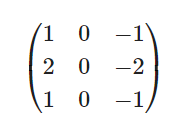

In [28]:
#read the image using cv2
image=cv2.imread("edge.jpg")


In [29]:
#convert to grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

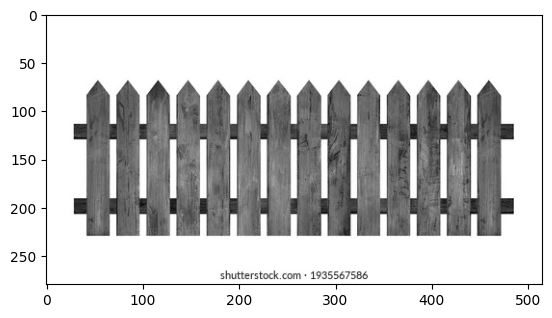

In [30]:
#show the grayscale image
plt.imshow(image, cmap='gray')

In [31]:
# apply convolution operation on this image to perform edge detection.
#use the function you made previosuly
image = convolution(np.array([[1,0,-1],[2,0,-2], [1,0,-1]]),image)

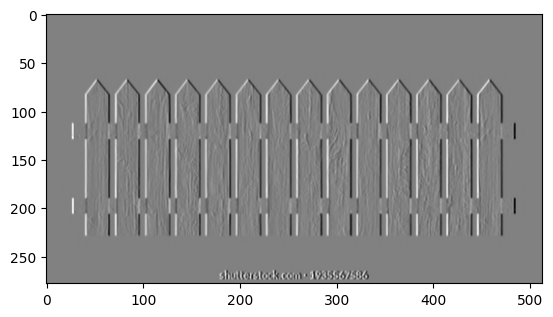

In [32]:
#imshow the new image after applying the convolution operation
plt.imshow(image, cmap='gray')

In [44]:
im = convolution(np.array([[1,0,-1],[2,0,-2], [1,0,-1]]),img5) #applying the convolution function to the grayscale of learn.jpg 

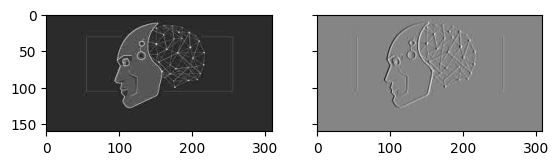

In [63]:
f=plt.figure()
ax1, ax2 = f.subplots(1,2, sharey=True,sharex=True)
ax1.imshow(img5, cmap='gray') # original grayscale of learn.jpg
ax2.imshow(im, cmap='gray') # vertical edges only

**Blurring**
* It is used to reduce noise in the image

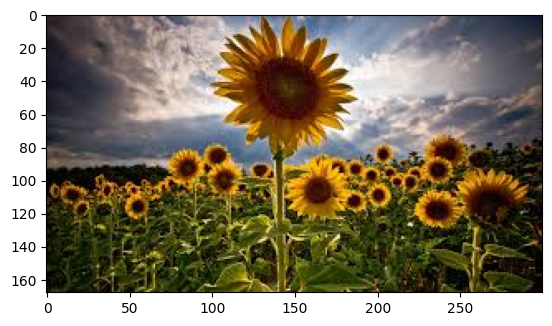

In [86]:
#read and show the image here
blur=cv2.imread("preprocessing.jpg")
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))

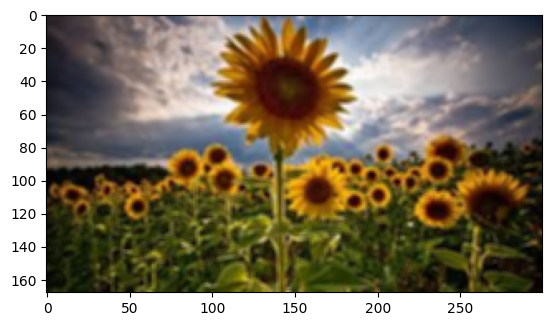

In [78]:
# Gaussian Blur
gaussian = cv2.GaussianBlur(blur,(3,3),cv2.BORDER_DEFAULT)
plt.imshow(cv2.cvtColor(gaussian, cv2.COLOR_BGR2RGB))

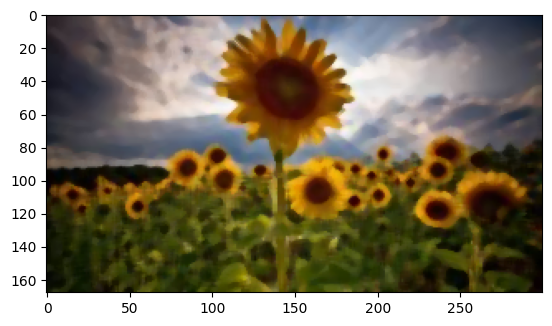

In [79]:
# Median Blur
median = cv2.medianBlur(blur,5)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))

**Edge Detection Using OpenCV**

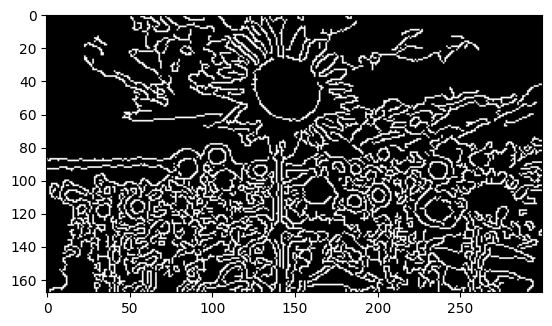

In [91]:
blur=cv2.imread("preprocessing.jpg")
blur = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY) #convert to grayscale
gaussian  = cv2.GaussianBlur(blur,(3,3),cv2.BORDER_DEFAULT)

t_lower = 50
t_upper = 150

edge = cv2.Canny(gaussian, t_lower, t_upper)
plt.imshow(edge, cmap='gray')

**Hough Transform**

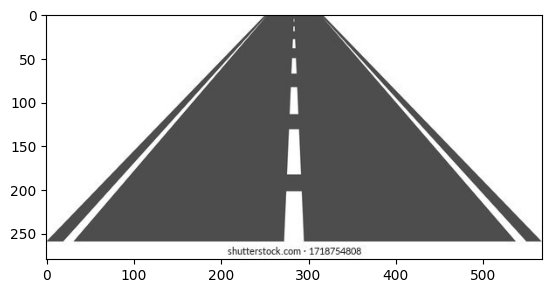

In [120]:
#read and show image here
im=cv2.imread("hough.jpg")
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

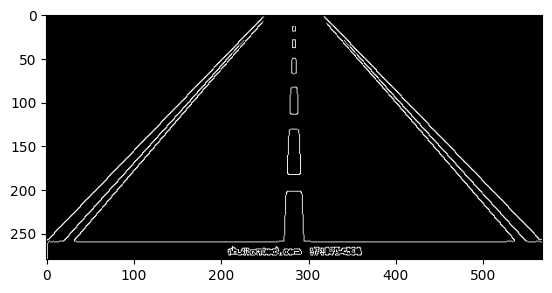

In [125]:
part1 = im.copy()
grey = cv2.cvtColor(part1, cv2.COLOR_BGR2GRAY)
gaus = cv2.GaussianBlur(grey,(3,3),cv2.BORDER_DEFAULT) #blur to remove noise
edges = cv2.Canny(gaus, 100, 300) #for edge detection
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 10) #apply hough transform to get the lines from the canny edge
for i in lines:
    x0, y0, x1, y1 = i[0]
    if x0 != x1 and y0 != y1:
      cv2.line(edges, (x0, y0), (x1, y1), (0, 0, 255), 3) #draw lines on the original image using cv2.line
    cv2.imwrite('hough.jpg', part1)
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))

C:\Users\a21ma\AppData\Local\Temp\ipykernel_16592\2285082171.py:8: RuntimeWarning: invalid value encountered in scalar divide
  if math.atan((y1-y0)/(x1-x0))>=-0.3 and math.atan((y1-y0)/(x1-x0))<=0.3 :


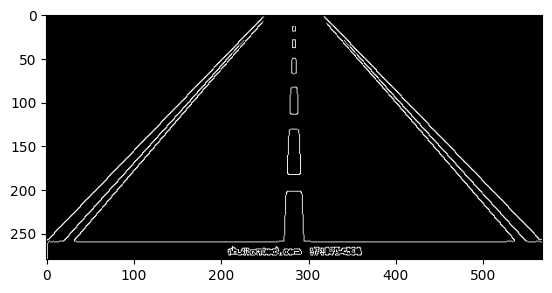

In [123]:
#Part 2 removes all the horizontal lines detected from the image and keeps all the vertically inclined lines which we might be interested in. (Imagine the use case of such an algorithm for driverless cars)
part2 = im.copy()
grey2 = cv2.cvtColor(part2, cv2.COLOR_BGR2GRAY)
gaus2 = cv2.GaussianBlur(grey2,(3,3),cv2.BORDER_DEFAULT)
edges2 = cv2.Canny(gaus2, 100, 300)
lines2 = cv2.HoughLines(edges2, 1, np.pi/180, 200)
for r_theta in lines2:
    
    if math.atan((y1-y0)/(x1-x0))>=-0.3 and math.atan((y1-y0)/(x1-x0))<=0.3 : #get all the lines found in the image and remove all lines with slope in the range [-0.3, 0.3].
        cv2.line(edges2, (x0, y0), (x1, y1), (0, 0, 255), 3) #draw lines on the image using cv2.line
    cv2.imwrite('hough.jpg', part2)
plt.imshow(cv2.cvtColor(edges2, cv2.COLOR_BGR2RGB))

**Binarization**

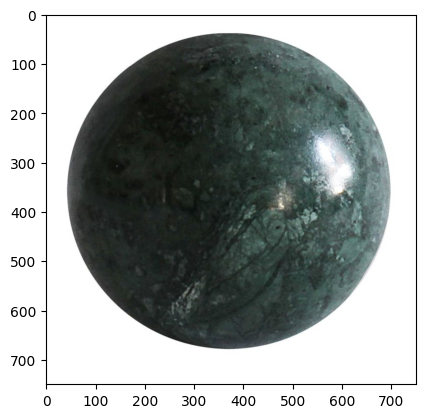

In [4]:
#read and show image here
image2=cv2.imread("marble.jpg")
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))

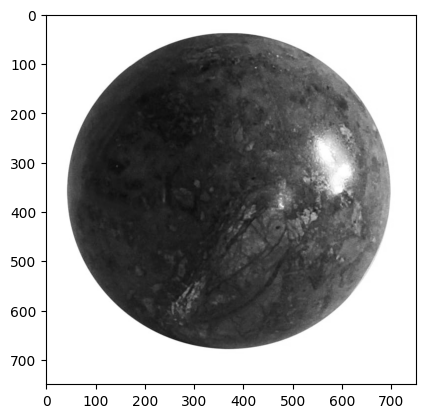

In [5]:
#convert to black and white (grayscale) and show image here 
bw = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(bw, cv2.COLOR_BGR2RGB))

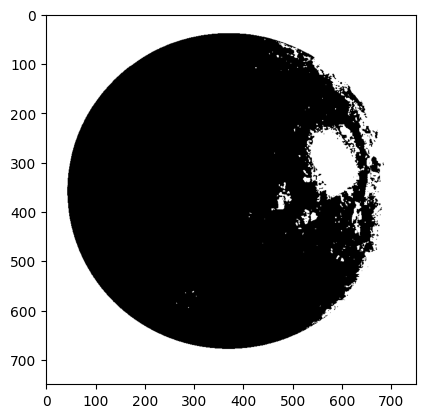

In [6]:
#binarize and show image here
(thresh, bw) = cv2.threshold(bw, 125, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(bw, cv2.COLOR_BGR2RGB))

**Morphological Transformations**

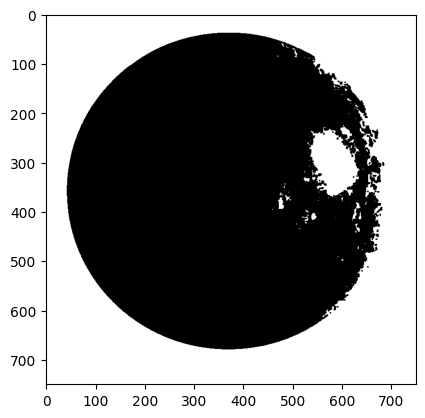

In [15]:
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(bw,kernel,iterations = 1)
plt.imshow(cv2.cvtColor(erosion, cv2.COLOR_BGR2RGB))
     